In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./data/tweets_features.csv", encoding='latin')

<Axes: >

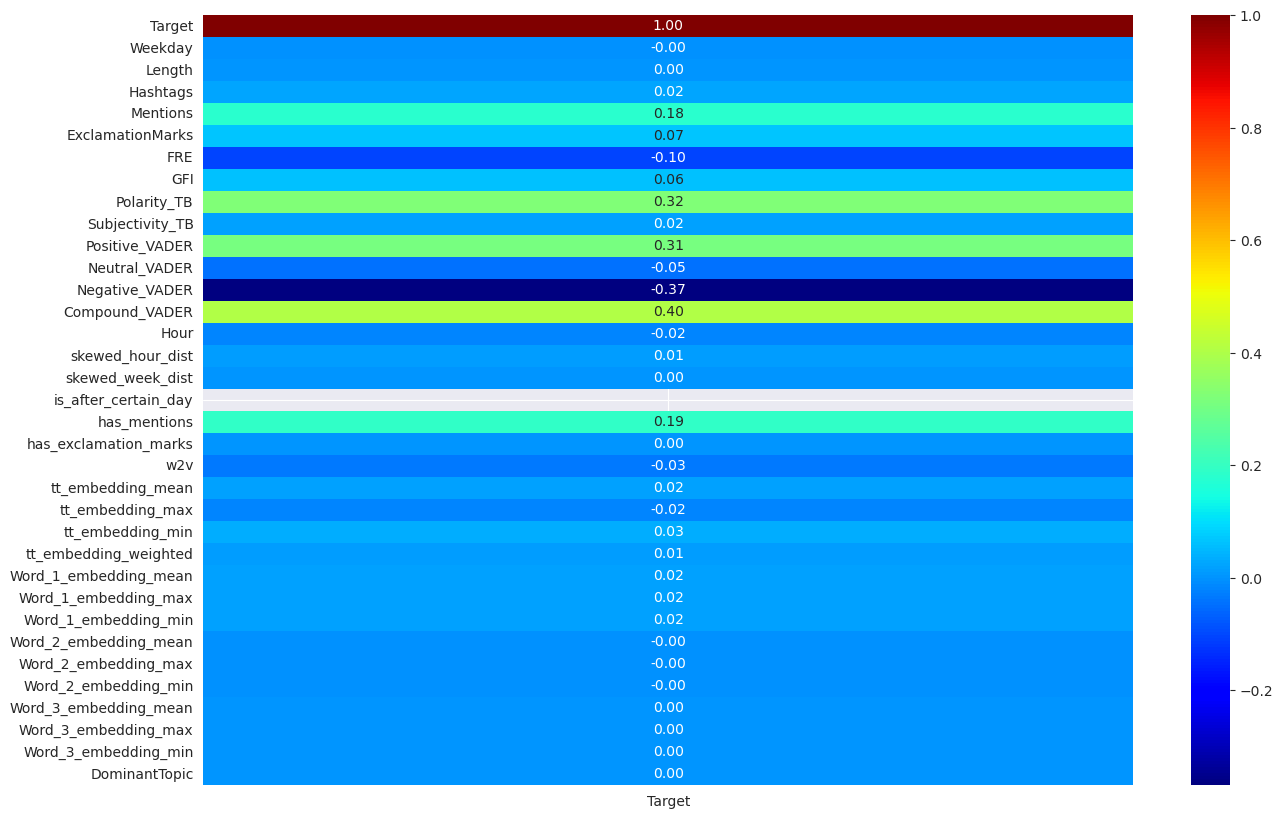

In [25]:
import seaborn as sns

corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr[["Target"]], annot=True, fmt=".2f", cmap='jet', cbar=True, square=False)

In [8]:
df

,Target,Date,User,Text,Weekday,Time,Full_date,Length,Hashtags,HasHashtags,...,Word_1_embedding_mean,Word_1_embedding_max,Word_1_embedding_min,Word_2_embedding_mean,Word_2_embedding_max,Word_2_embedding_min,Word_3_embedding_mean,Word_3_embedding_max,Word_3_embedding_min,DominantTopic
0,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,0,22:19:49,2009-04-06,111,0,False,...,21617.0,21617.0,21617.0,603.000000,751.0,455.0,1407.0,1407.0,1407.0,2
1,0,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,0,22:19:53,2009-04-06,89,0,False,...,6766.0,6766.0,6766.0,4047.000000,4047.0,4047.0,1135.0,1135.0,1135.0,9
2,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,0,22:19:57,2009-04-06,47,0,False,...,67733.0,67733.0,67733.0,2664.000000,2664.0,2664.0,11029.0,11029.0,11029.0,0
3,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",0,22:19:57,2009-04-06,111,0,False,...,2201.0,2201.0,2201.0,4151.000000,4151.0,4151.0,20920.0,20920.0,20920.0,5
4,0,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,0,22:20:00,2009-04-06,29,0,False,...,271.5,455.0,88.0,1962.000000,1962.0,1962.0,67733.0,67733.0,67733.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388395,1,2009-05-27 07:27:38,LizAnjos,"@NintendoRed sometimes, you just have to let go!",2,07:27:38,2009-05-27,49,0,False,...,3427.0,3427.0,3427.0,1169.000000,1169.0,1169.0,57753.0,57753.0,57753.0,2
388396,1,2009-05-27 07:27:38,TiernanDouieb,@misswiz ah. Perhaps point her in the directio...,2,07:27:38,2009-05-27,64,0,False,...,606.0,606.0,606.0,1494.000000,1494.0,1494.0,2837.0,2837.0,2837.0,7
388397,1,2009-05-27 07:27:38,ExpertDater,@SingleInThe604 Nice to meet you u too! Im gla...,2,07:27:38,2009-05-27,70,0,False,...,64510.0,64510.0,64510.0,1591.333333,4215.0,268.0,7203.0,7203.0,7203.0,6
388398,1,2009-05-27 07:27:38,bpende,"@ChrisCavs : I love you, man... you making me ...",2,07:27:38,2009-05-27,71,0,False,...,58234.0,58234.0,58234.0,1543.000000,1543.0,1543.0,28936.0,28936.0,28936.0,8


In [9]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['number'])
X = X.drop(['Target'], axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=0.001, class_weight='balanced', penalty='l1', solver='liblinear', random_state=2115)

log_clf.fit(X_scaled, y)

model = SelectFromModel(log_clf, prefit=True)
X_train_t = model.transform(X_scaled)
X_train_t.shape

(388400, 19)

In [11]:
feature_names = X.columns
selected_mask = model.get_support()
selected_features = feature_names[selected_mask]
print("Selected features:", selected_features)

Selected features: Index(['Length', 'Hashtags', 'Mentions', 'ExclamationMarks', 'FRE', 'GFI',
       'Polarity_TB', 'Subjectivity_TB', 'Positive_VADER', 'Negative_VADER',
       'Compound_VADER', 'Hour', 'skewed_hour_dist', 'has_mentions', 'w2v',
       'tt_embedding_mean', 'tt_embedding_max', 'tt_embedding_weighted',
       'Word_2_embedding_max'],
      dtype='object')


In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_scaled, y)
imp = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_train_t = model.transform(X_scaled)
X_train_t.shape

KeyboardInterrupt: 